# Bike Sharing Regression

    This notebook explains how we can go about explore and prepare data for model building.The notebook is structured in the following way 

 - About Dataset
 - Data Summary
 - Feature Engineering
 - Missing Value Analysis
 - Outlier Analysis
 - Correlation Analysis
 - Visualizing Distribution Of Data
 - Visualizing Count Vs (Month,Season,Hour,Weekday,Usertype)
 - Filling 0's In Windspeed Using Random Forest
 - Linear Regression Model
 - Regularization Models
 - Ensemble Models

## About Dataset

#### **Overview**

Bike sharing systems are a means of renting bicycles where the process of obtaining membership, rental, and bike return is automated via a network of kiosk locations throughout a city. Using these systems, people are able rent a bike from a one location and return it to a different place on an as-needed basis. Currently, there are over 500 bike-sharing programs around the world.

#### **Data Fields**

* datetime - hourly date + timestamp  
* season -  1 = spring, 2 = summer, 3 = fall, 4 = winter 
* holiday - whether the day is considered a holiday
* workingday - whether the day is neither a weekend nor holiday
* weather - 
    * 1: Clear, Few clouds, Partly cloudy, Partly cloudy
    * 2: Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist
    * 3: Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds
    * 4: Heavy Rain + Ice Pallets + Thunderstorm + Mist, Snow + Fog 
* temp - temperature in Celsius
* atemp - "feels like" temperature in Celsius
* humidity - relative humidity
* windspeed - wind speed
* casual - number of non-registered user rentals initiated
* registered - number of registered user rentals initiated
* count - number of total rentals (Dependent Variable)

## Loading Libraries needed

In [1]:
import numpy     as np
import pandas    as pd
import matplotlib.pyplot as plt
import seaborn   as sns
import pylab
import calendar
from scipy import stats as sci
import missingno as msno
from datetime import datetime

import warnings 
%matplotlib inline
warnings.filterwarnings('ignore')

## Importing the dataset 

In [2]:
data = pd.read_csv('train.csv')
data

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0000,3,13,16
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0000,8,32,40
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0000,5,27,32
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0000,3,10,13
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0000,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...
10881,2012-12-19 19:00:00,4,0,1,1,15.58,19.695,50,26.0027,7,329,336
10882,2012-12-19 20:00:00,4,0,1,1,14.76,17.425,57,15.0013,10,231,241
10883,2012-12-19 21:00:00,4,0,1,1,13.94,15.910,61,15.0013,4,164,168
10884,2012-12-19 22:00:00,4,0,1,1,13.94,17.425,61,6.0032,12,117,129


### Creating a dataframe that contains a copy from the data to work on

In [3]:
df = data.copy()
df

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0000,3,13,16
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0000,8,32,40
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0000,5,27,32
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0000,3,10,13
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0000,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...
10881,2012-12-19 19:00:00,4,0,1,1,15.58,19.695,50,26.0027,7,329,336
10882,2012-12-19 20:00:00,4,0,1,1,14.76,17.425,57,15.0013,10,231,241
10883,2012-12-19 21:00:00,4,0,1,1,13.94,15.910,61,15.0013,4,164,168
10884,2012-12-19 22:00:00,4,0,1,1,13.94,17.425,61,6.0032,12,117,129


### Getting data info

    1. Getting the size of the dataset.

In [4]:
df.shape

(10886, 12)

    2.  Getting Summary statistics of the Data.

In [5]:
 df.describe()

,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
count,10886.000000,10886.000000,10886.000000,10886.000000,10886.00000,10886.000000,10886.000000,10886.000000,10886.000000,10886.000000,10886.000000
mean,2.506614,0.028569,0.680875,1.418427,20.23086,23.655084,61.886460,12.799395,36.021955,155.552177,191.574132
std,1.116174,0.166599,0.466159,0.633839,7.79159,8.474601,19.245033,8.164537,49.960477,151.039033,181.144454
min,1.000000,0.000000,0.000000,1.000000,0.82000,0.760000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,2.000000,0.000000,0.000000,1.000000,13.94000,16.665000,47.000000,7.001500,4.000000,36.000000,42.000000
50%,3.000000,0.000000,1.000000,1.000000,20.50000,24.240000,62.000000,12.998000,17.000000,118.000000,145.000000
75%,4.000000,0.000000,1.000000,2.000000,26.24000,31.060000,77.000000,16.997900,49.000000,222.000000,284.000000
max,4.000000,1.000000,1.000000,4.000000,41.00000,45.455000,100.000000,56.996900,367.000000,886.000000,977.000000


     All the count are the same, so I have no missing values here.

    3. Getting the data info to know the datatype, the non-null counts for each feature

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10886 entries, 0 to 10885
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   datetime    10886 non-null  object 
 1   season      10886 non-null  int64  
 2   holiday     10886 non-null  int64  
 3   workingday  10886 non-null  int64  
 4   weather     10886 non-null  int64  
 5   temp        10886 non-null  float64
 6   atemp       10886 non-null  float64
 7   humidity    10886 non-null  int64  
 8   windspeed   10886 non-null  float64
 9   casual      10886 non-null  int64  
 10  registered  10886 non-null  int64  
 11  count       10886 non-null  int64  
dtypes: float64(3), int64(8), object(1)
memory usage: 1020.7+ KB


    4. Counting Unique values for each Column.

In [7]:
## counting unique values for each col
df.apply(lambda x:len(x.unique()))

datetime      10886
season            4
holiday           2
workingday        2
weather           4
temp             49
atemp            60
humidity         89
windspeed        28
casual          309
registered      731
count           822
dtype: int64

## Data Preprocessing

### Checking for nulls

In [8]:
df.isnull().sum()

datetime      0
season        0
holiday       0
workingday    0
weather       0
temp          0
atemp         0
humidity      0
windspeed     0
casual        0
registered    0
count         0
dtype: int64

In [9]:
df[df == 0].count()

datetime          0
season            0
holiday       10575
workingday     3474
weather           0
temp              0
atemp             0
humidity         22
windspeed      1313
casual          986
registered       15
count             0
dtype: int64

In [10]:
df['holiday'].value_counts()

0    10575
1      311
Name: holiday, dtype: int64

In [11]:
df['workingday'].value_counts()

1    7412
0    3474
Name: workingday, dtype: int64

In [12]:
df['humidity'].value_counts()

88    368
94    324
83    316
87    289
70    259
     ... 
8       1
10      1
97      1
96      1
91      1
Name: humidity, Length: 89, dtype: int64

In [13]:
df['windspeed'].value_counts()

0.0000     1313
8.9981     1120
11.0014    1057
12.9980    1042
7.0015     1034
15.0013     961
6.0032      872
16.9979     824
19.0012     676
19.9995     492
22.0028     372
23.9994     274
26.0027     235
27.9993     187
30.0026     111
31.0009      89
32.9975      80
35.0008      58
39.0007      27
36.9974      22
43.0006      12
40.9973      11
43.9989       8
46.0022       3
56.9969       2
47.9988       2
51.9987       1
50.0021       1
Name: windspeed, dtype: int64

In [14]:
df['casual'].value_counts()

0      986
1      667
2      487
3      438
4      354
      ... 
332      1
361      1
356      1
331      1
304      1
Name: casual, Length: 309, dtype: int64

In [15]:
df['registered'].value_counts()

3      195
4      190
5      177
6      155
2      150
      ... 
570      1
422      1
678      1
565      1
636      1
Name: registered, Length: 731, dtype: int64

## Feature Engineering

As from step 3 in getting data info 
   - The columns "season", "holiday", "workingday", "weather" are "int" datatype, But they should by of "categorical" datatype.

In order to transform them first I have to 
   1. splitting the "Datetime" column into "date", "hour" 
   2. Getting the "weekday", "month" columns out of "date" column
   3. Change the datatype of "season", "weather", "holiday", "workingday" into "category" datatype
   4. Dropping the original DateTime Column.

In [16]:
# 1- splitting the "Datetime" column into "date", "hour"
df["date"] = df.datetime.apply(lambda dateNum : dateNum.split()[0])
df["hour"] = df.datetime.apply(lambda hourNum : hourNum.split()[1].split(":")[0])

# 2- Getting the "weekday", "month" columns out of "date" column
df["weekday"] = df.date.apply(lambda dateStr : calendar.day_name[datetime.strptime(dateStr,"%Y-%m-%d").weekday()])
df["month"] = df.date.apply(lambda dateStr : calendar.month_name[datetime.strptime(dateStr,"%Y-%m-%d").month])

# - Labling "season", "weather" for the sake of visualization
df["season"] = df.season.map({1: "Spring", 2 : "Summer", 3 : "Fall", 4 :"Winter" })
df["weather"] = df.weather.map({1: " Clear + Few clouds + Partly cloudy + Partly cloudy",\
                                        2 : " Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist ", \
                                        3 : " Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds", \
                                        4 :" Heavy Rain + Ice Pallets + Thunderstorm + Mist, Snow + Fog " })
df

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count,date,hour,weekday,month
0,2011-01-01 00:00:00,Spring,0,0,Clear + Few clouds + Partly cloudy + Partly c...,9.84,14.395,81,0.0000,3,13,16,2011-01-01,00,Saturday,January
1,2011-01-01 01:00:00,Spring,0,0,Clear + Few clouds + Partly cloudy + Partly c...,9.02,13.635,80,0.0000,8,32,40,2011-01-01,01,Saturday,January
2,2011-01-01 02:00:00,Spring,0,0,Clear + Few clouds + Partly cloudy + Partly c...,9.02,13.635,80,0.0000,5,27,32,2011-01-01,02,Saturday,January
3,2011-01-01 03:00:00,Spring,0,0,Clear + Few clouds + Partly cloudy + Partly c...,9.84,14.395,75,0.0000,3,10,13,2011-01-01,03,Saturday,January
4,2011-01-01 04:00:00,Spring,0,0,Clear + Few clouds + Partly cloudy + Partly c...,9.84,14.395,75,0.0000,0,1,1,2011-01-01,04,Saturday,January
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10881,2012-12-19 19:00:00,Winter,0,1,Clear + Few clouds + Partly cloudy + Partly c...,15.58,19.695,50,26.0027,7,329,336,2012-12-19,19,Wednesday,December
10882,2012-12-19 20:00:00,Winter,0,1,Clear + Few clouds + Partly cloudy + Partly c...,14.76,17.425,57,15.0013,10,231,241,2012-12-19,20,Wednesday,December
10883,2012-12-19 21:00:00,Winter,0,1,Clear + Few clouds + Partly cloudy + Partly c...,13.94,15.910,61,15.0013,4,164,168,2012-12-19,21,Wednesday,December
10884,2012-12-19 22:00:00,Winter,0,1,Clear + Few clouds + Partly cloudy + Partly c...,13.94,17.425,61,6.0032,12,117,129,2012-12-19,22,Wednesday,December


   3. Changing the datatype of "season", "weather", "holiday", "workingday" into "category" datatype

In [17]:
catigoricalColumns = ["hour","weekday","month","season","weather","holiday","workingday"]
for var in catigoricalColumns:
    df[var] = df[var].astype("category")

### Checking for datatype change.

In [18]:
df.dtypes

datetime        object
season        category
holiday       category
workingday    category
weather       category
temp           float64
atemp          float64
humidity         int64
windspeed      float64
casual           int64
registered       int64
count            int64
date            object
hour          category
weekday       category
month         category
dtype: object

   4. Dopping the "datetime" column after Feature Enginnering it.

In [19]:
df = df.drop(["datetime"], axis = 1)

In [20]:
display(df.head())

,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count,date,hour,weekday,month
0,Spring,0,0,Clear + Few clouds + Partly cloudy + Partly c...,9.84,14.395,81,0.0,3,13,16,2011-01-01,00,Saturday,January
1,Spring,0,0,Clear + Few clouds + Partly cloudy + Partly c...,9.02,13.635,80,0.0,8,32,40,2011-01-01,01,Saturday,January
2,Spring,0,0,Clear + Few clouds + Partly cloudy + Partly c...,9.02,13.635,80,0.0,5,27,32,2011-01-01,02,Saturday,January
3,Spring,0,0,Clear + Few clouds + Partly cloudy + Partly c...,9.84,14.395,75,0.0,3,10,13,2011-01-01,03,Saturday,January
4,Spring,0,0,Clear + Few clouds + Partly cloudy + Partly c...,9.84,14.395,75,0.0,0,1,1,2011-01-01,04,Saturday,January


## Data Preprocessing

## Checking for nulls

In [21]:
df.isnull().sum()

season        0
holiday       0
workingday    0
weather       0
temp          0
atemp         0
humidity      0
windspeed     0
casual        0
registered    0
count         0
date          0
hour          0
weekday       0
month         0
dtype: int64

In [22]:
df[df == 0].count()

season            0
holiday       10575
workingday     3474
weather           0
temp              0
atemp             0
humidity         22
windspeed      1313
casual          986
registered       15
count             0
date              0
hour              0
weekday           0
month             0
dtype: int64

In [23]:
df['holiday'].value_counts()

0    10575
1      311
Name: holiday, dtype: int64

In [24]:
df['workingday'].value_counts()

1    7412
0    3474
Name: workingday, dtype: int64

In [25]:
df['humidity'].value_counts()

88    368
94    324
83    316
87    289
70    259
     ... 
8       1
10      1
97      1
96      1
91      1
Name: humidity, Length: 89, dtype: int64

In [26]:
df['windspeed'].value_counts()

0.0000     1313
8.9981     1120
11.0014    1057
12.9980    1042
7.0015     1034
15.0013     961
6.0032      872
16.9979     824
19.0012     676
19.9995     492
22.0028     372
23.9994     274
26.0027     235
27.9993     187
30.0026     111
31.0009      89
32.9975      80
35.0008      58
39.0007      27
36.9974      22
43.0006      12
40.9973      11
43.9989       8
46.0022       3
56.9969       2
47.9988       2
51.9987       1
50.0021       1
Name: windspeed, dtype: int64

In [27]:
df['casual'].value_counts()

0      986
1      667
2      487
3      438
4      354
      ... 
332      1
361      1
356      1
331      1
304      1
Name: casual, Length: 309, dtype: int64

In [28]:
df['registered'].value_counts()

3      195
4      190
5      177
6      155
2      150
      ... 
570      1
422      1
678      1
565      1
636      1
Name: registered, Length: 731, dtype: int64

    There is no nulls in the data we have here but in some columns like "" there is _ZEROZ_ doesn't make sense so we can figure out from this that the missing values are replaced with nulls.
    We will handle these zeros usning *Random Forest* Algorithm

<AxesSubplot:>

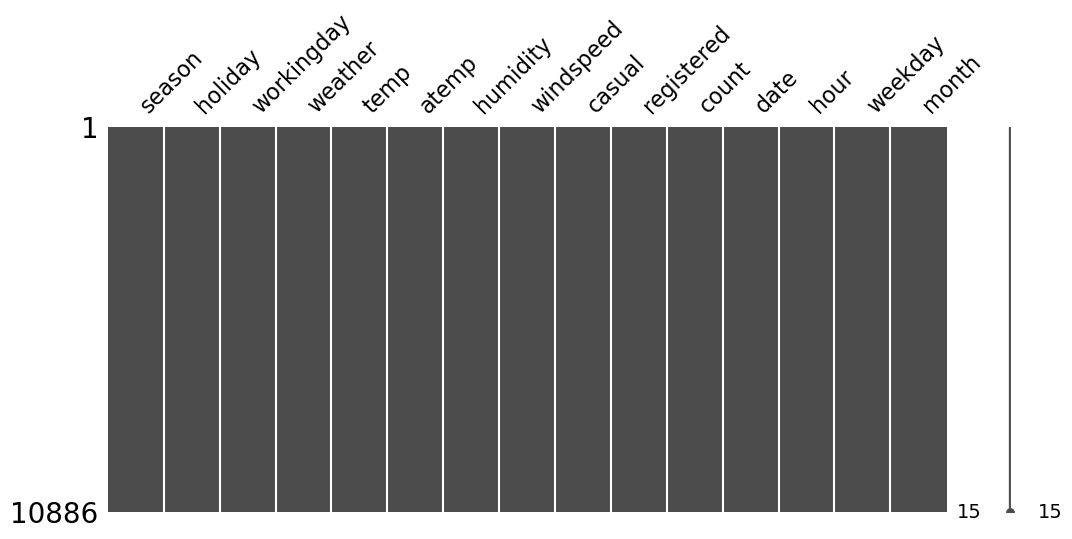

In [29]:
msno.matrix(df
            , figsize = (12, 5),color=(0.3, 0.3, 0.3)
            , fontsize=16
            , labels=None
            , label_rotation=45
           )

<AxesSubplot:>

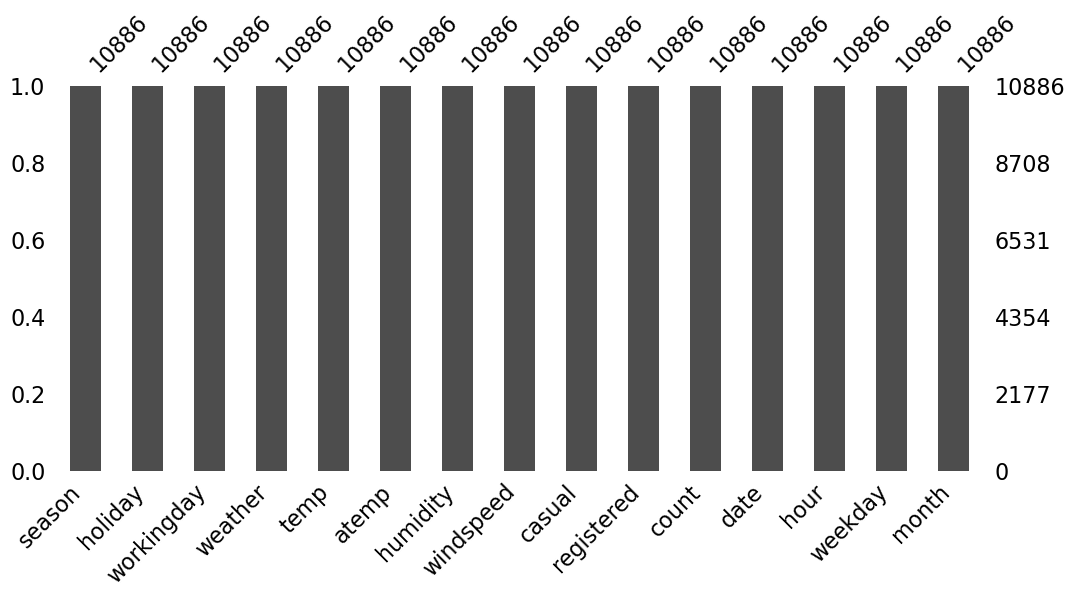

In [30]:
msno.bar(df
            , figsize = (12, 5),color=(0.3, 0.3, 0.3)
            , fontsize=16
            , labels=None
            , label_rotation=45
           )

## Checking for Outliers

[Text(0.5, 0, 'Working Day'),
 Text(0, 0.5, 'Count'),
 Text(0.5, 1.0, 'Box Plot On Count Across Working Day')]

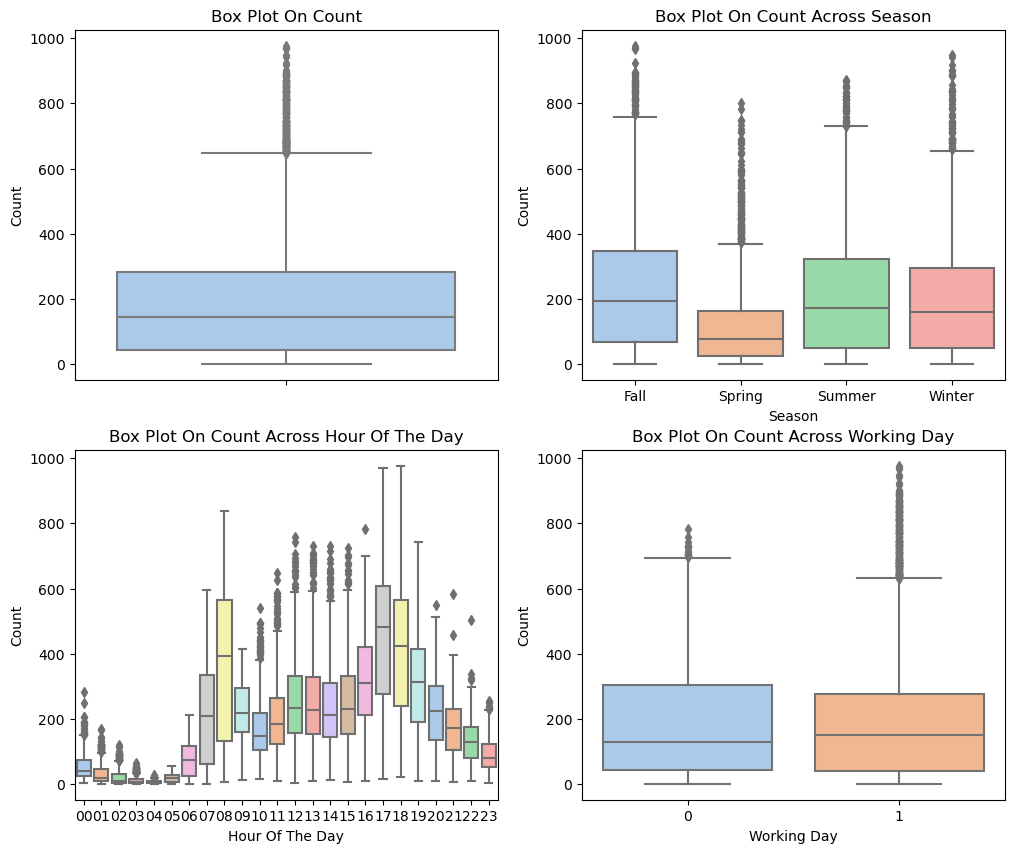

In [31]:
fig, axes = plt.subplots(nrows=2, ncols=2)
fig.set_size_inches(12, 10)
sns.boxplot(data=df,y="count"                  , orient="v", palette = "pastel", ax=axes[0][0])
sns.boxplot(data=df,y="count", x = "season"    , orient="v", palette = "pastel", ax=axes[0][1])
sns.boxplot(data=df,y="count", x = "hour"      , orient="v", palette = "pastel", ax=axes[1][0])
sns.boxplot(data=df,y="count", x = "workingday", orient="v", palette = "pastel", ax=axes[1][1])

axes[0][0].set(ylabel='Count'                          , title="Box Plot On Count")
axes[0][1].set(xlabel='Season'         , ylabel='Count', title="Box Plot On Count Across Season")
axes[1][0].set(xlabel='Hour Of The Day', ylabel='Count', title="Box Plot On Count Across Hour Of The Day")
axes[1][1].set(xlabel='Working Day'    , ylabel='Count', title="Box Plot On Count Across Working Day")

[Text(0.5, 0, 'Working Day'),
 Text(0, 0.5, 'Count'),
 Text(0.5, 1.0, 'column chart On Count Across Working Day')]

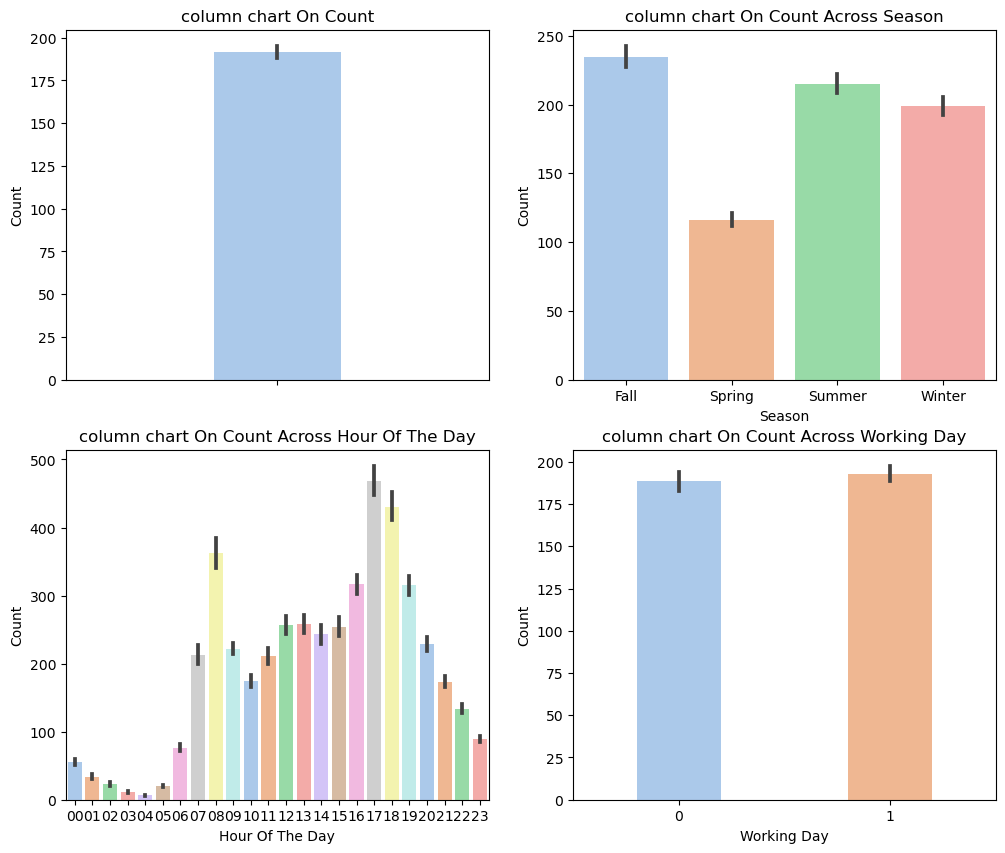

In [32]:
fig, axes = plt.subplots(nrows=2, ncols=2)
fig.set_size_inches(12, 10)
sns.barplot(data=df,y="count"                  , orient="v", width=0.3, palette = "pastel", ax=axes[0][0])
sns.barplot(data=df,y="count", x = "season"    , orient="v", width=0.8, palette = "pastel", ax=axes[0][1])
sns.barplot(data=df,y="count", x = "hour"      , orient="v", width=0.8, palette = "pastel", ax=axes[1][0])
sns.barplot(data=df,y="count", x = "workingday", orient="v", width=0.4, palette = "pastel", ax=axes[1][1])

axes[0][0].set(ylabel='Count'                          , title="column chart On Count")
axes[0][1].set(xlabel='Season'         , ylabel='Count', title="column chart On Count Across Season")
axes[1][0].set(xlabel='Hour Of The Day', ylabel='Count', title="column chart On Count Across Hour Of The Day")
axes[1][1].set(xlabel='Working Day'    , ylabel='Count', title="column chart On Count Across Working Day")

    in the "count" column there is a lot of outliers which make the distributions skewed to the right. 
    by grouping the "count" feature by other features like "seasons", "hour", "workingday"
        1. Spring season has lower count than other seasons.
        2. From "hour" boxplots, the MODE of the MEDIAN are relatively higher at (07:00 to 08:00) which can be explained mostly with people going to work or school and (17:00 to 18:00) which can be explained mostly with people going back from school or work.
        3. From "workingday" boxplots, the outliers are most frequent at working days than off days.

# Handling Outliers

    Handling outliers by removing 3 standard deviations above and below.

In [33]:
dfWithoutOutliers = df[np.abs(df["count"] - df["count"].mean())<=(3 * df["count"].std())] 

#### checking data counts after removing the outliers

In [34]:
print("df: ", df.shape)
print("dfWithoutOutliers: ", dfWithoutOutliers.shape)

df:  (10886, 15)
dfWithoutOutliers:  (10739, 15)


## Correlation 

### checking the correlation between variables

In [35]:
df.corr()

,temp,atemp,humidity,windspeed,casual,registered,count
temp,1.000000,0.984948,-0.064949,-0.017852,0.467097,0.318571,0.394454
atemp,0.984948,1.000000,-0.043536,-0.057473,0.462067,0.314635,0.389784
humidity,-0.064949,-0.043536,1.000000,-0.318607,-0.348187,-0.265458,-0.317371
windspeed,-0.017852,-0.057473,-0.318607,1.000000,0.092276,0.091052,0.101369
casual,0.467097,0.462067,-0.348187,0.092276,1.000000,0.497250,0.690414
registered,0.318571,0.314635,-0.265458,0.091052,0.497250,1.000000,0.970948
count,0.394454,0.389784,-0.317371,0.101369,0.690414,0.970948,1.000000


### Visiualizing the correlation using heatmap to make it easier to understand

<AxesSubplot:>

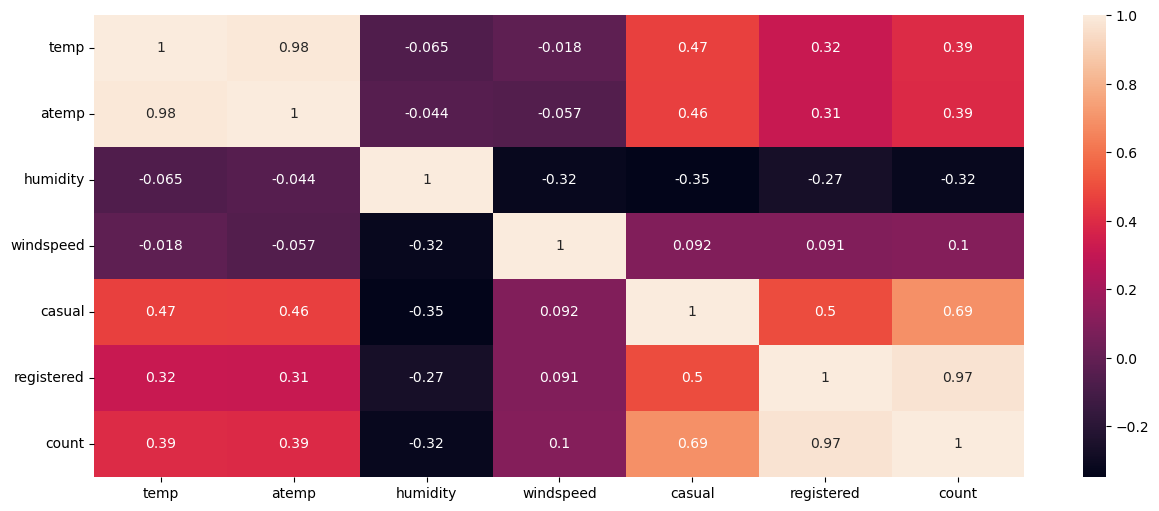

In [36]:
df.corr()
df_mask = np.array(df.corr())
df_mask[np.tril_indices_from(df_mask)] = False
## resizing the figure 
plt.figure(figsize = (15, 6))
sns.heatmap(df.corr(),  annot = True)

From the above correlation Matrix and correlation heatmap we found that :
   1. "temp" & "humidity" features have not very prominent correaltion between them, still the count variable has got little dependency on "temp" and "humidity".
   2. "windspeed" is not gonna be really useful numerical feature and it is visible from it correlation value with "count".
   3. "atemp" is variable is not taken into since "atemp" and "temp" has got strong correlation with each other. During model building any one of the variable has to be dropped since they will exhibit multicollinearity in the data.
   4. "Casual" and "Registered" are also not taken into account since they are leakage variables in nature and need to dropped during model building.

#### Visualizing the 3 variables that can be taken in the model using scatter plot

<AxesSubplot:xlabel='temp', ylabel='count'>

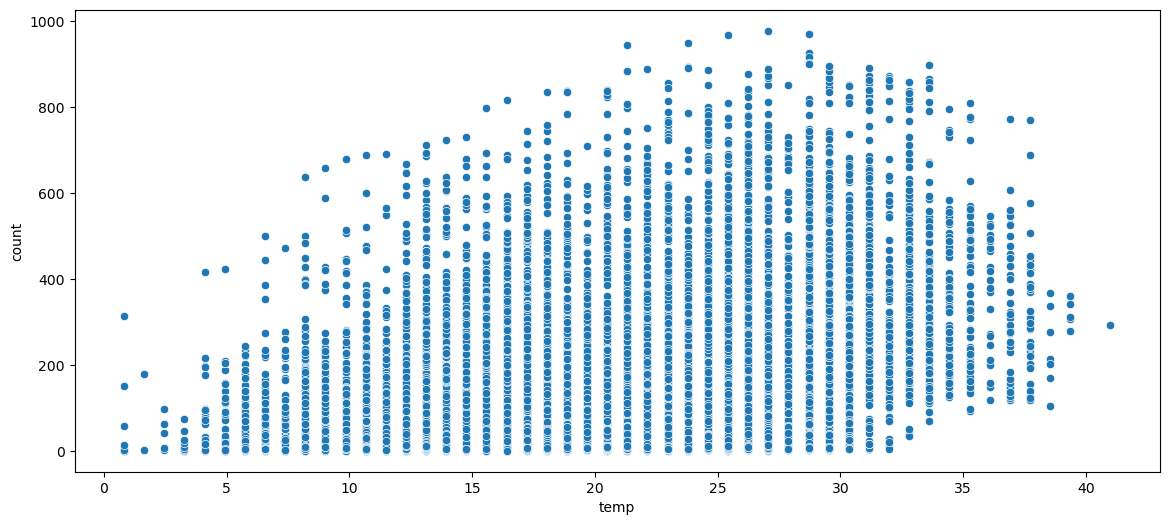

In [37]:
#fig.set_size_inches(12, 18)
plt.figure(figsize = (14, 6))
sns.scatterplot(x="temp" , y="count", data=df, palette = "pastel")


<AxesSubplot:xlabel='windspeed', ylabel='count'>

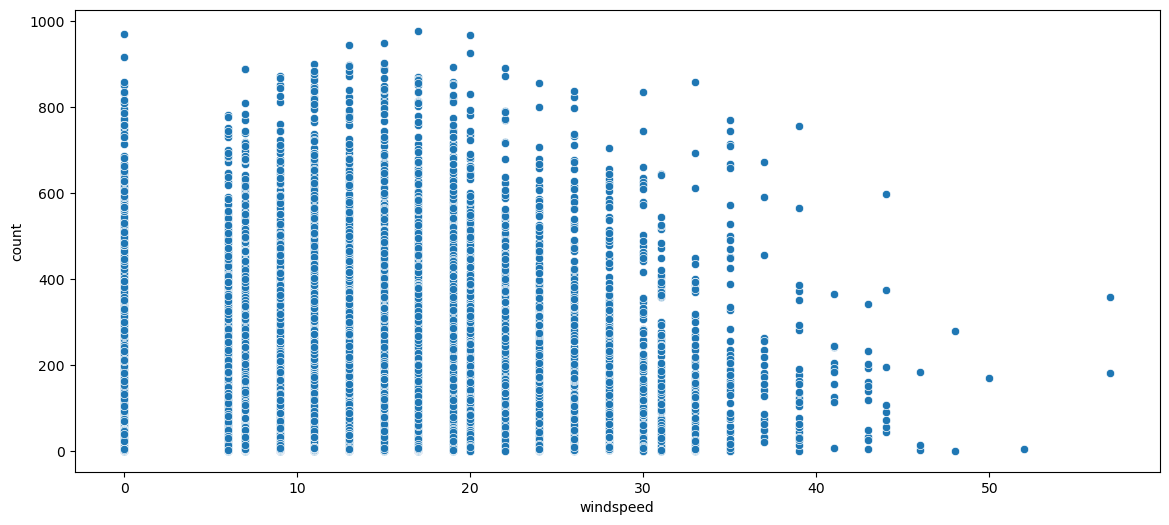

In [38]:
#fig.set_size_inches(12, 18)
plt.figure(figsize = (14, 6))
sns.scatterplot(x="windspeed" , palette = "pastel", y="count", data=df)


<AxesSubplot:xlabel='humidity', ylabel='count'>

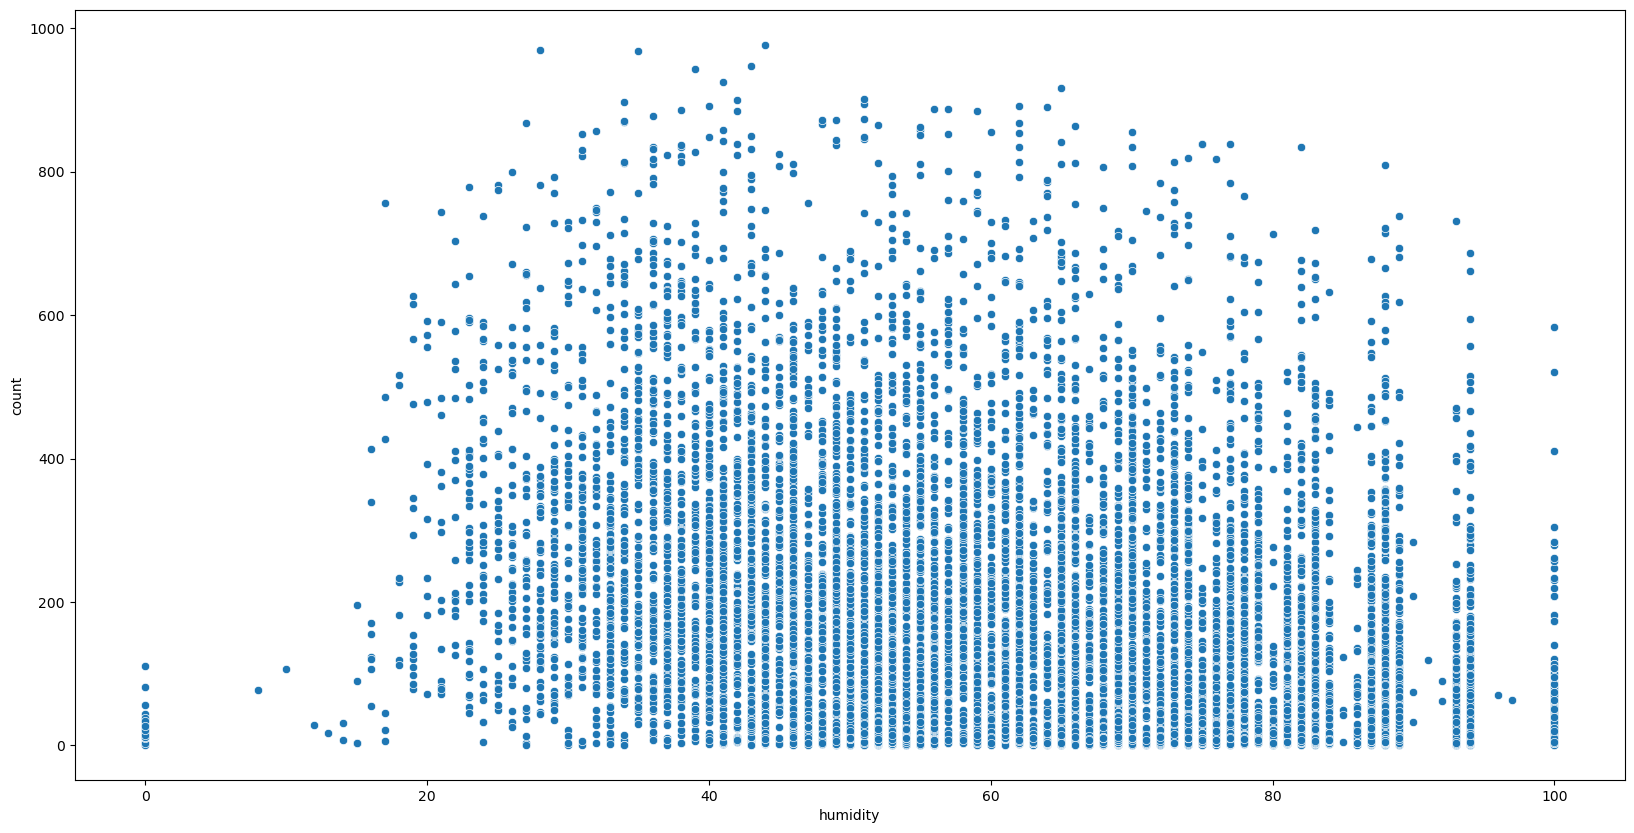

In [39]:
#fig.set_size_inches(12, 18)
plt.figure(figsize = (20, 10))
sns.scatterplot(x="humidity", palette = "pastel" , y="count", data=df)

### Visualizing the distribution of the data

[Text(0, 0.5, 'Count'),
 Text(0.5, 1.0, 'Distripution of "Count" without outliers')]

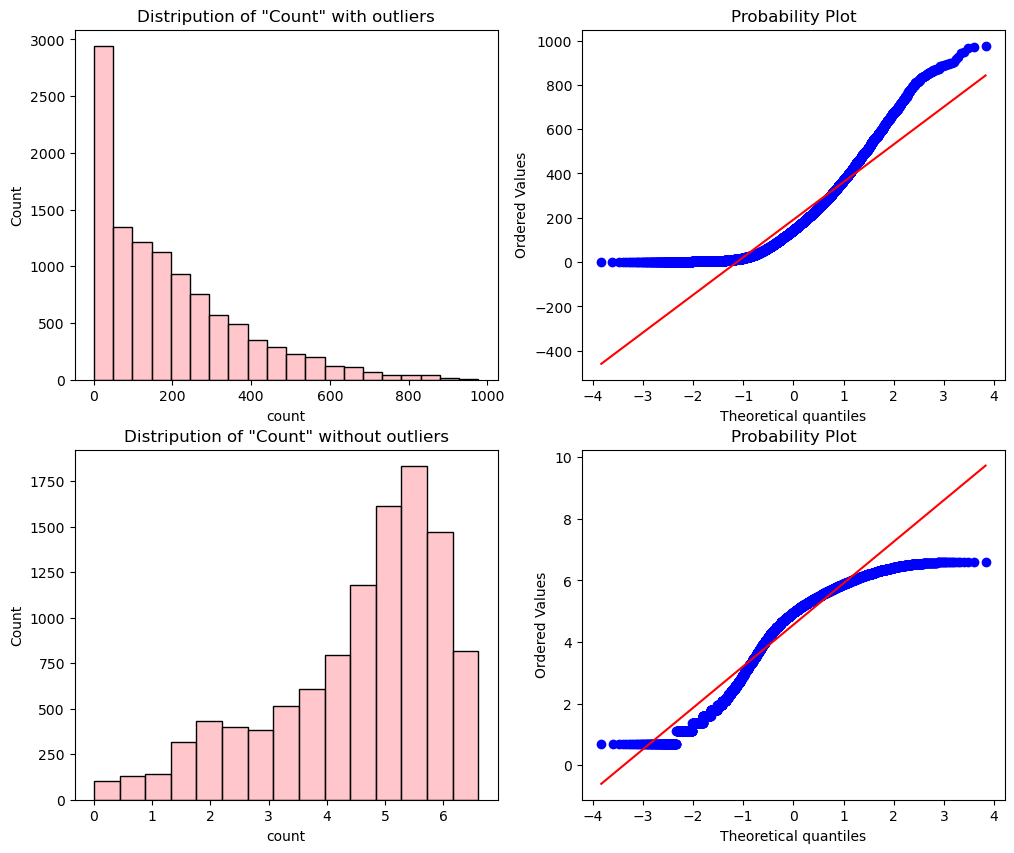

In [40]:
fig, axes = plt.subplots(ncols=2, nrows=2)
fig.set_size_inches(12, 10)
sns.histplot( df["count"],
              palette='pastel',
              color = (1,.7,.73),
              bins= 20,
              ax=axes[0][0]
            )

sci.probplot(df["count"], dist='norm', fit=True, plot=axes[0][1])

sns.histplot(np.log(dfWithoutOutliers["count"]),
              palette='pastel',
              color = (1,.7,.73),
              bins= 15,
              ax=axes[1][0]
             )

sci.probplot(np.log1p(dfWithoutOutliers["count"]), dist='norm', fit=True, plot=axes[1][1])


axes[0][0].set(ylabel='Count', title='Distripution of "Count" with outliers')
axes[1][0].set(ylabel='Count', title='Distripution of "Count" without outliers')

### From the above graphs found that:
  1. at the original state, the "count" feature is skewed to the right. 
  2. As our desire is to have normal distribution I have decided to take the log transformation of the "count"feature.
  3. the values will look better but not in the normal distribution form yet so I will continue the preprocessing of the data

# Exploring the variable "count" with the discrete variables we have

[Text(0.5, 0, 'Hour Of The Day'),
 Text(0, 0.5, 'Users Count'),
 Text(0.5, 1.0, 'Average Users Count By Hour Of The Day Across User Type'),
 None]

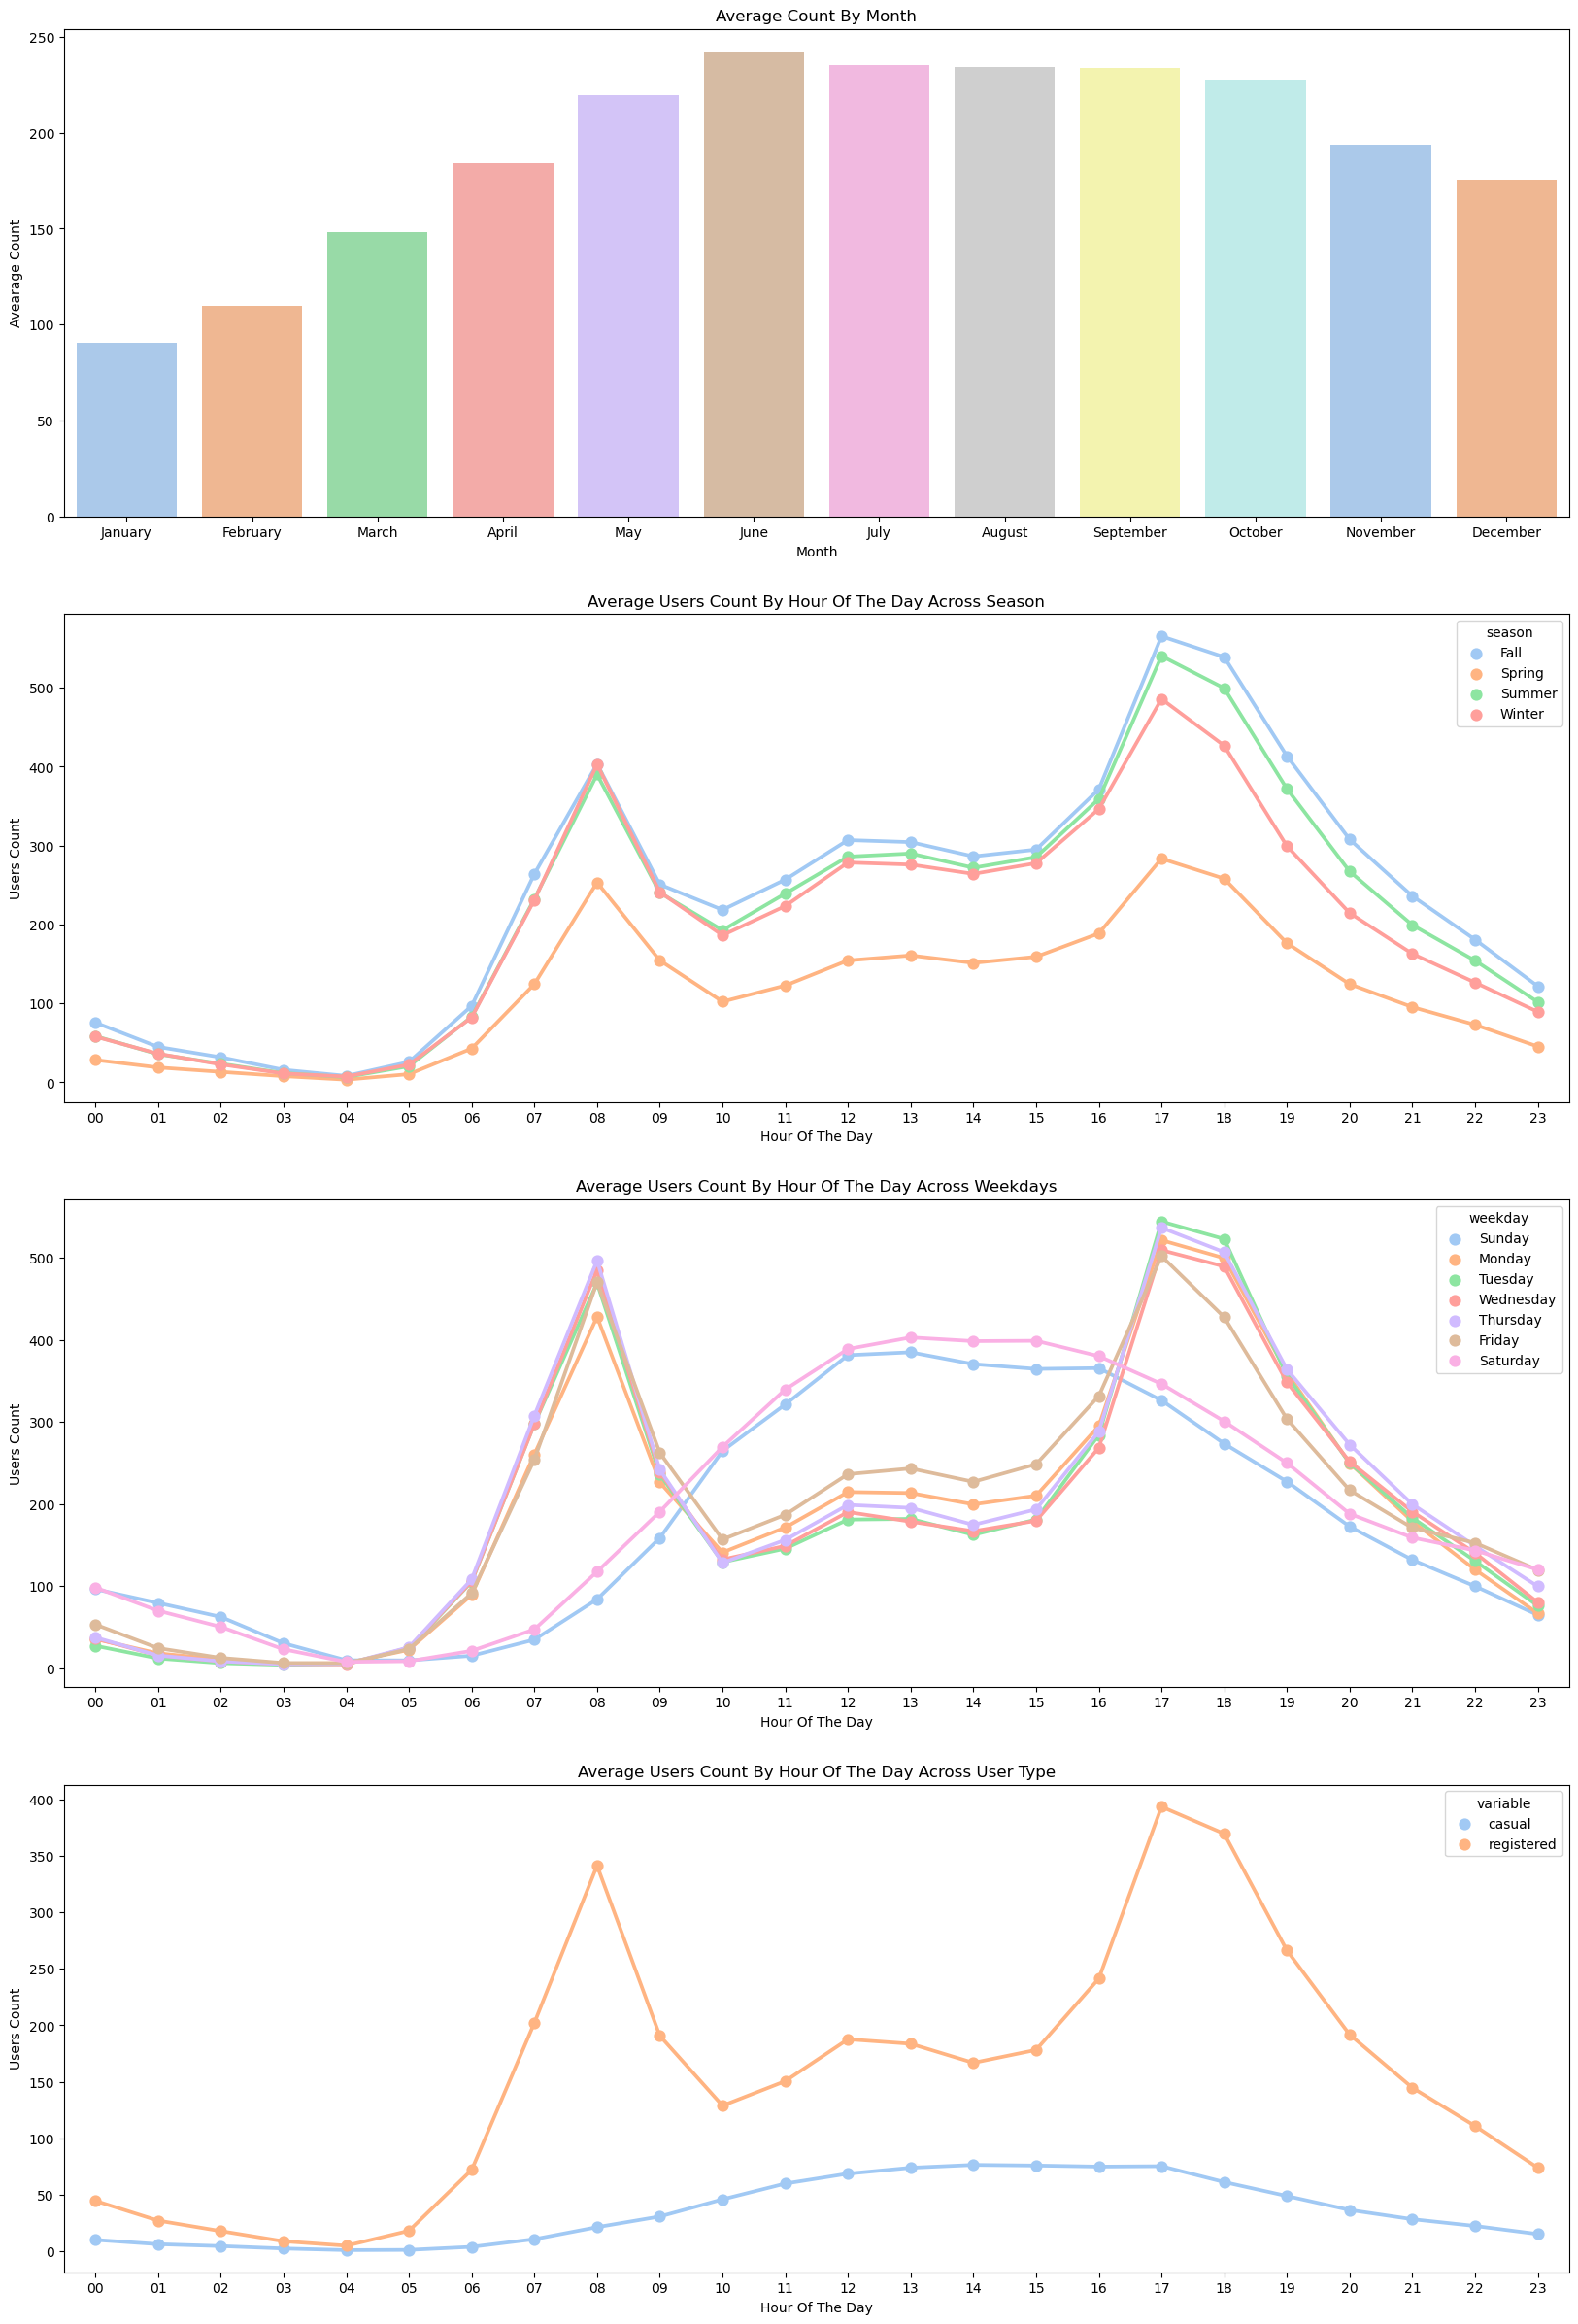

In [41]:
fig,(ax1,ax2,ax3,ax4) = plt.subplots(nrows=4)
fig.set_size_inches(20,30)
sortOrder = ["January","February","March","April","May","June","July","August","September","October","November","December"]
hueOrder = ["Sunday","Monday","Tuesday","Wednesday","Thursday","Friday","Saturday"]

monthAggregated = pd.DataFrame(df.groupby("month")["count"].mean()).reset_index()
monthSorted = monthAggregated.sort_values(by = "count",
                                          ascending=False
                                         )
sns.barplot(data=monthSorted,
            x="month", 
            y="count", 
            ax=ax1,
            palette='pastel',
            order=sortOrder
           )
ax1.set(xlabel='Month', ylabel='Avearage Count',title="Average Count By Month")

hourAggregated = pd.DataFrame(df.groupby(["hour","season"],sort=True)["count"].mean()).reset_index()
sns.pointplot(x=hourAggregated["hour"], 
              y=hourAggregated["count"],
              hue=hourAggregated["season"], 
              data=hourAggregated, 
              palette='pastel',
              join=True,
              ax = ax2)
ax2.set(xlabel='Hour Of The Day', 
        ylabel='Users Count',
        title="Average Users Count By Hour Of The Day Across Season",
        label='big')

hourAggregated = pd.DataFrame(df.groupby(["hour","weekday"],sort=True)["count"].mean()).reset_index()
sns.pointplot(x=hourAggregated["hour"], 
              y=hourAggregated["count"],
              hue=hourAggregated["weekday"],
              hue_order=hueOrder, 
              data=hourAggregated, 
              palette='pastel',
              join=True,
              ax = ax3
             )
ax3.set(xlabel='Hour Of The Day', 
        ylabel='Users Count',
        title="Average Users Count By Hour Of The Day Across Weekdays",
        label='big')

hourTransformed = pd.melt(df[["hour","casual","registered"]], 
                          id_vars=['hour'], 
                          value_vars=['casual', 'registered'])
hourAggregated = pd.DataFrame(hourTransformed.groupby(["hour","variable"],sort=True)["value"].mean()).reset_index()
sns.pointplot(x = hourAggregated["hour"], 
              y = hourAggregated["value"],
              hue = hourAggregated["variable"],
              hue_order = ["casual", "registered"], 
              data = hourAggregated, 
              join = True,
              palette = 'pastel',
              ax = ax4)
ax4.set(xlabel='Hour Of The Day', 
        ylabel='Users Count',
        title="Average Users Count By Hour Of The Day Across User Type",
        label='big')

    From the above charts it is obvious that:
   1. People tend to rent a bike during summer since it is really conductive to ride bike at that season.
   2. People tend to rent a bike at "workingday" at (07:00 to 08:00) which can be explained mostly with people going to work or school and (17:00 to 18:00) which can be explained mostly with people going back from school or work.
   3. at "Saturday" and "Sunday" more people rent bikes in (10:00 to 16:00) as they are off days.
   4. The peak we talked about at point to at periods (07:00 to 08:00) and (17:00 to 18:00) are mostly rejistered users.

# Filling zeros in windspeed using Random Forest algorithm as mentioned before

#### Importing training and testing data to run the same algorithm on.

In [42]:
trainData = pd.read_csv("train.csv")
testData  = pd.read_csv("test.csv")

In [43]:
#display(trainData.head())

In [44]:
display(testData.head())

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed
0,2011-01-20 00:00:00,1,0,1,1,10.66,11.365,56,26.0027
1,2011-01-20 01:00:00,1,0,1,1,10.66,13.635,56,0.0000
2,2011-01-20 02:00:00,1,0,1,1,10.66,13.635,56,0.0000
3,2011-01-20 03:00:00,1,0,1,1,10.66,12.880,56,11.0014
4,2011-01-20 04:00:00,1,0,1,1,10.66,12.880,56,11.0014


In [45]:
data = trainData.append(testData)
data.reset_index( inplace = True)
data.drop("index", inplace = True, axis = 1)

## Feature engineering

In [46]:
data["date"] = data.datetime.apply(lambda x : x.split()[0])
data["hour"] = data.datetime.apply(lambda x : x.split()[1].split(":")[0]).astype("int")
data["year"] = data.datetime.apply(lambda x : x.split()[0].split("-")[0])
data["weekday"] = data.date.apply(lambda dateString : datetime.strptime(dateString,"%Y-%m-%d").weekday())
data["month"] = data.date.apply(lambda dateString : datetime.strptime(dateString,"%Y-%m-%d").month)

### Random Forest algorithm

In [47]:
from sklearn.ensemble import RandomForestRegressor

dataWind0 = data[data["windspeed"]==0]
dataWindNot0 = data[data["windspeed"]!=0]
rfModel_wind = RandomForestRegressor()
windColumns = ["season","weather","humidity","month","temp","year","atemp"]
rfModel_wind.fit(dataWindNot0[windColumns], dataWindNot0["windspeed"])

wind0Values = rfModel_wind.predict(X= dataWind0[windColumns])
dataWind0["windspeed"] = wind0Values
data = dataWindNot0.append(dataWind0)
data.reset_index(inplace=True)
data.drop('index',inplace=True,axis=1)

### Changing cols data type

In [48]:
categoricalFeatureNames = ["season","holiday","workingday","weather","weekday","month","year","hour"]
numericalFeatureNames = ["temp","humidity","windspeed","atemp"]
dropFeatures = ['casual',"count","datetime","date","registered"]

In [49]:
for var in categoricalFeatureNames:
    data[var] = data[var].astype("category")

### Splitting data into train and test

In [50]:
dataTrain = data[pd.notnull(data['count'])].sort_values(by=["datetime"])
dataTest = data[~pd.notnull(data['count'])].sort_values(by=["datetime"])
datetimecol = dataTest["datetime"]
yLabels = dataTrain["count"]
yLablesRegistered = dataTrain["registered"]
yLablesCasual = dataTrain["casual"]

In [51]:
dataTrain

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count,date,hour,year,weekday,month
15199,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,6.830192,3.0,13.0,16.0,2011-01-01,0,2011,5,1
15200,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,6.711993,8.0,32.0,40.0,2011-01-01,1,2011,5,1
15201,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,6.711993,5.0,27.0,32.0,2011-01-01,2,2011,5,1
15202,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,6.750261,3.0,10.0,13.0,2011-01-01,3,2011,5,1
15203,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,6.750261,0.0,1.0,1.0,2011-01-01,4,2011,5,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9568,2012-12-19 19:00:00,4,0,1,1,15.58,19.695,50,26.002700,7.0,329.0,336.0,2012-12-19,19,2012,2,12
9569,2012-12-19 20:00:00,4,0,1,1,14.76,17.425,57,15.001300,10.0,231.0,241.0,2012-12-19,20,2012,2,12
9570,2012-12-19 21:00:00,4,0,1,1,13.94,15.910,61,15.001300,4.0,164.0,168.0,2012-12-19,21,2012,2,12
9571,2012-12-19 22:00:00,4,0,1,1,13.94,17.425,61,6.003200,12.0,117.0,129.0,2012-12-19,22,2012,2,12


In [52]:
dataTest

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count,date,hour,year,weekday,month
9573,2011-01-20 00:00:00,1,0,1,1,10.66,11.365,56,26.002700,NaN,NaN,NaN,2011-01-20,0,2011,3,1
16512,2011-01-20 01:00:00,1,0,1,1,10.66,13.635,56,8.660342,NaN,NaN,NaN,2011-01-20,1,2011,3,1
16513,2011-01-20 02:00:00,1,0,1,1,10.66,13.635,56,8.660342,NaN,NaN,NaN,2011-01-20,2,2011,3,1
9574,2011-01-20 03:00:00,1,0,1,1,10.66,12.880,56,11.001400,NaN,NaN,NaN,2011-01-20,3,2011,3,1
9575,2011-01-20 04:00:00,1,0,1,1,10.66,12.880,56,11.001400,NaN,NaN,NaN,2011-01-20,4,2011,3,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15194,2012-12-31 19:00:00,1,0,1,2,10.66,12.880,60,11.001400,NaN,NaN,NaN,2012-12-31,19,2012,0,12
15195,2012-12-31 20:00:00,1,0,1,2,10.66,12.880,60,11.001400,NaN,NaN,NaN,2012-12-31,20,2012,0,12
15196,2012-12-31 21:00:00,1,0,1,1,10.66,12.880,60,11.001400,NaN,NaN,NaN,2012-12-31,21,2012,0,12
15197,2012-12-31 22:00:00,1,0,1,1,10.66,13.635,56,8.998100,NaN,NaN,NaN,2012-12-31,22,2012,0,12


In [53]:
yLablesRegistered

15199     13.0
15200     32.0
15201     27.0
15202     10.0
15203      1.0
         ...  
9568     329.0
9569     231.0
9570     164.0
9571     117.0
9572      84.0
Name: registered, Length: 10886, dtype: float64

In [54]:
len('dataTrain')
len('dataTest')
len('datetimecol')
len('yLablesRegistered')

17

In [55]:
dataTrain.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10886 entries, 15199 to 9572
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   datetime    10886 non-null  object  
 1   season      10886 non-null  category
 2   holiday     10886 non-null  category
 3   workingday  10886 non-null  category
 4   weather     10886 non-null  category
 5   temp        10886 non-null  float64 
 6   atemp       10886 non-null  float64 
 7   humidity    10886 non-null  int64   
 8   windspeed   10886 non-null  float64 
 9   casual      10886 non-null  float64 
 10  registered  10886 non-null  float64 
 11  count       10886 non-null  float64 
 12  date        10886 non-null  object  
 13  hour        10886 non-null  category
 14  year        10886 non-null  category
 15  weekday     10886 non-null  category
 16  month       10886 non-null  category
dtypes: category(8), float64(6), int64(1), object(2)
memory usage: 937.7+ KB


### Dropping non needed variables 

In [56]:
dataTrain  = dataTrain.drop(dropFeatures,axis=1)
dataTest  = dataTest.drop(dropFeatures,axis=1)

In [72]:
dataTrain.head(5)

,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,hour,year,weekday,month
15199,1,0,0,1,9.84,14.395,81,6.830192,0,2011,5,1
15200,1,0,0,1,9.02,13.635,80,6.711993,1,2011,5,1
15201,1,0,0,1,9.02,13.635,80,6.711993,2,2011,5,1
15202,1,0,0,1,9.84,14.395,75,6.750261,3,2011,5,1
15203,1,0,0,1,9.84,14.395,75,6.750261,4,2011,5,1


### **RMSLE Scorer**

In [57]:
def rmsle(y, y_,convertExp=True):
    if convertExp:
        y = np.exp(y),
        y_ = np.exp(y_)
    log1 = np.nan_to_num(np.array([np.log(v + 1) for v in y]))
    log2 = np.nan_to_num(np.array([np.log(v + 1) for v in y_]))
    calc = (log1 - log2) ** 2
    return np.sqrt(np.mean(calc))

## Linear Regression Model

In [58]:
from sklearn.linear_model import LinearRegression,Ridge,Lasso
from sklearn.model_selection import GridSearchCV
from sklearn import metrics
import warnings
pd.options.mode.chained_assignment = None
warnings.filterwarnings("ignore", category=DeprecationWarning)

# Initialize logistic regression model
lModel = LinearRegression()

# Train the model
yLabelsLog = np.log1p(yLabels)
lModel.fit(X = dataTrain,y = yLabelsLog)

# Make predictions
preds = lModel.predict(X= dataTrain)
print ("RMSLE Value For Linear Regression: ",rmsle(np.exp(yLabelsLog),np.exp(preds),False))

RMSLE Value For Linear Regression:  0.9779716848523355


In [59]:
ridge_m_ = Ridge()
ridge_params_ = { 'max_iter':[3000],'alpha':[0.1, 1, 2, 3, 4, 10, 30,100,200,300,400,800,900,1000]}
rmsle_scorer = metrics.make_scorer(rmsle, greater_is_better=False)
grid_ridge_m = GridSearchCV( ridge_m_,
                          ridge_params_,
                          scoring = rmsle_scorer,
                          cv=5)
yLabelsLog = np.log1p(yLabels)
grid_ridge_m.fit( dataTrain, yLabelsLog )
preds = grid_ridge_m.predict(X= dataTrain)
print (grid_ridge_m.best_params_)
print ("RMSLE Value For Ridge Regression: ",rmsle(np.exp(yLabelsLog),np.exp(preds),False))


{'alpha': 0.1, 'max_iter': 3000}
RMSLE Value For Ridge Regression:  0.977971669783334


## Regression model using lasso

In [60]:
lasso_m_ = Lasso()

alpha  = 1/np.array([0.1, 1, 2, 3, 4, 10, 30,100,200,300,400,800,900,1000])
lasso_params_ = { 'max_iter':[3000],'alpha':alpha}

grid_lasso_m = GridSearchCV( lasso_m_,lasso_params_,scoring = rmsle_scorer,cv=5)
yLabelsLog = np.log1p(yLabels)
grid_lasso_m.fit( dataTrain, yLabelsLog )
preds = grid_lasso_m.predict(X= dataTrain)
print (grid_lasso_m.best_params_)
print ("RMSLE Value For Lasso Regression: ",rmsle(np.exp(yLabelsLog),np.exp(preds),False))

{'alpha': 0.005, 'max_iter': 3000}
RMSLE Value For Lasso Regression:  0.9781087413435852


## Ensemble Random Forest

    A Random Forest is an ensemble technique capable of performing both regression and classification tasks with the use of multiple decision trees and a technique called Bootstrap Aggregation, commonly known as bagging. What is bagging you may ask? Bagging, in the Random Forest method, involves training each decision tree on a different data sample where sampling is done with replacement.

In [61]:
from sklearn.ensemble import RandomForestRegressor
rfModel = RandomForestRegressor(n_estimators=300)
yLabelsLog = np.log1p(yLabels)
rfModel.fit(dataTrain, yLabelsLog)
relation_square = rfModel.score(dataTrain, yLabelsLog)
print('relation_square : ', relation_square)
preds = rfModel.predict(X= dataTrain)
print ("RMSLE Value For Random Forest: ",rmsle(np.exp(yLabelsLog),np.exp(preds),False))

relation_square :  0.9941188130079771
RMSLE Value For Random Forest:  0.10126804895110852


### Preparing model for submission

In [62]:
dfs = pd.read_csv('sampleSubmission.csv')
dfs

,datetime,count
0,2011-01-20 00:00:00,0
1,2011-01-20 01:00:00,0
2,2011-01-20 02:00:00,0
3,2011-01-20 03:00:00,0
4,2011-01-20 04:00:00,0
...,...,...
6488,2012-12-31 19:00:00,0
6489,2012-12-31 20:00:00,0
6490,2012-12-31 21:00:00,0
6491,2012-12-31 22:00:00,0


In [63]:
result = rfModel.predict(dataTest)

In [64]:
dfs['count'] = result

In [65]:
newDateTime = pd.read_csv("test.csv")

In [66]:
dfs["datetime"] = newDateTime["datetime"]

In [67]:
dfs.to_csv("bikesubmission.csv", index = False)

In [68]:
df_submission = pd.read_csv("bikesubmission.csv")
df_submission

,datetime,count
0,2011-01-20 00:00:00,2.476539
1,2011-01-20 01:00:00,1.762955
2,2011-01-20 02:00:00,1.352936
3,2011-01-20 03:00:00,1.419677
4,2011-01-20 04:00:00,1.301578
...,...,...
6488,2012-12-31 19:00:00,5.675513
6489,2012-12-31 20:00:00,5.319218
6490,2012-12-31 21:00:00,4.979341
6491,2012-12-31 22:00:00,4.732728


In [69]:
df_empty = pd.DataFrame()

In [70]:
df_empty["count"] = rfModel.predict(dataTest)

In [71]:
df_empty

,count
0,2.476539
1,1.762955
2,1.352936
3,1.419677
4,1.301578
...,...
6488,5.675513
6489,5.319218
6490,4.979341
6491,4.732728
